# Maple Mono 使用指南

当你敲下每一行代码，字体在替你表达气质与专注。Maple Mono 的目的很简单：让阅读与书写变得顺畅、统一、并拥有恰到好处的个性。

## 安装与环境配置

### 方式一：桌面系统安装

- **Windows**  
  解压字体文件，全部选中，右键选择“安装”或“为所有用户安装”，然后在编辑器与终端里选择字体名称。

- **macOS**  
  双击 `.ttf` / `.otf`，使用“字体册”安装，然后在 iTerm2、JetBrains、VS Code 中选择对应字体族。

- **Linux**  
  - 用户级：将字体放入 `~/.local/share/fonts` 或 `~/.fonts`，运行 `fc-cache -fv`  
  - 系统级：放入 `/usr/local/share/fonts` 或 `/usr/share/fonts`，刷新缓存
  
  > 验证：运行 `fc-list | grep -i "maple"` 或在编辑器字体列表中搜索“Maple Mono”。

### 方式二：源码安装

下载源码并[安装字体](https://github.com/xinetzone/maple-font)：

```bash
git clone --recursive https://github.com/xinetzone/maple-font.git
cd maple-font
pip install -ve .
```

导入库后，首次使用会自动构建字体文件（约需要 2-3 分钟）：

```python
import maple_font
# 首次导入时会显示：[maple-font] 首次使用，开始构建 Maple Mono 字体...
```

## 在 Matplotlib 中设置字体

使用 `set_font()` 函数可以一键设置 Matplotlib 使用 Maple Mono 字体：

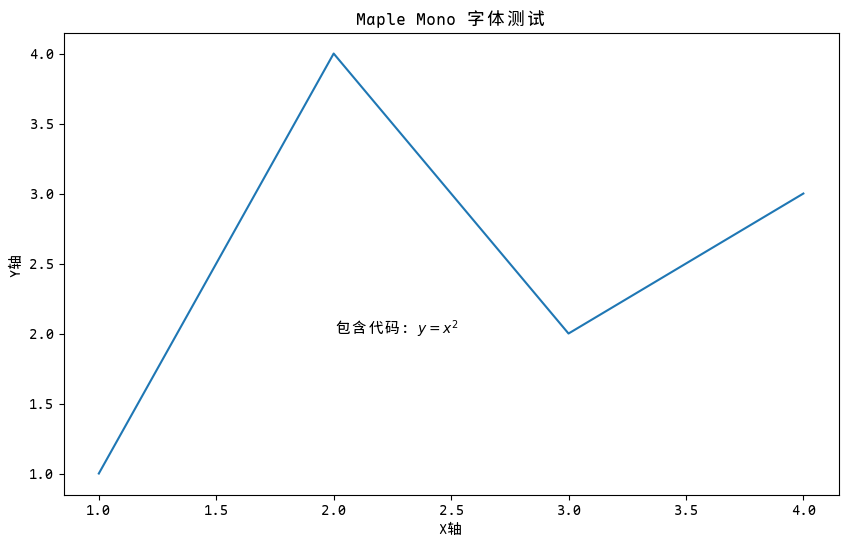

In [1]:
import matplotlib.pyplot as plt
import maple_font

# 设置使用包含中文字符和 Nerd Font 图标的字体
maple_font.set_font(font_type="NF-CN")

# 现在绘制的图表将使用 Maple Mono 字体显示中文和代码
plt.figure(figsize=(10, 6))
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])
plt.title("Maple Mono 字体测试")
plt.xlabel("X轴")
plt.ylabel("Y轴")
plt.text(2, 2, "包含代码: $y = x^2$")
plt.show()

支持的字体类型包括：
- `"NF-CN"`：包含 Nerd Font 图标和中文字符的字体（推荐）
- `"NF"`：包含 Nerd Font 图标但无中文字符的字体
- `"TTF"`：标准 TTF 格式字体
- `"TTF-AutoHint"`：经过 AutoHint 优化的 TTF 格式字体
- `"Variable"`：可变字体

## Glyph 管理

In [2]:
import maple_font

# 获取可用的 glyph 列表
glyphs = maple_font.get_available_glyphs(font_type="NF-CN")
print(f"找到 {len(glyphs)} 个可用 glyph")
print(f"前10个 glyph: {glyphs[:10]}")

# 检查特定 glyph 是否存在
glyph_exists = maple_font.check_glyph_exists("glyph_name", font_type="NF-CN")
print(f"Glyph 'glyph_name' 是否存在: {glyph_exists}")

找到 33617 个可用 glyph
前10个 glyph: ['.notdef', '.notdef.1', '.null', 'A', 'A-cy', 'A.bg', 'AE', 'AEacute', 'Aacute', 'Abreve']
Glyph 'glyph_name' 是否存在: False


## 自定义字体构建

你可以构建包含特定 glyph 的自定义字体：

In [3]:
import maple_font

# 构建包含自定义 glyph 的字体
success = maple_font.build_with_custom_glyphs(
    glyphs=["glyph1", "glyph2"],  # 替换为你需要的 glyph 名称
    force_rebuild=True,  # 强制重新构建
    verbose=True  # 显示详细信息
)

if success:
    print("自定义字体构建成功")
else:
    print("自定义字体构建失败")

[maple-font-builder] 将包含自定义glyphs: ['glyph1', 'glyph2']
[maple-font-builder] 正在调用构建脚本: /media/pc/data/lxw/ai/tasks/maple-font/build.py，参数: ['--ttf-only', '--nf', '--cn', '--least-styles', '--feat', 'glyph1,glyph2']


🧹 Clean cache...

🚩 Start building Maple Mono Version 7.700 ...

👉 Variable version for MapleMono-Italic[wght]-VF.ttf
Rename glyph names
Generating feature string with italic=True, cn=False, normal=False, calt=True, variable=False, infinite=True, tag=True
Skip weight remapping since nothing changed.
✅ Verified glyph width in MapleMono-Italic[wght]-VF.ttf
Fix GASP table
👉 Variable version for MapleMono[wght]-VF.ttf
Rename glyph names
Generating feature string with italic=False, cn=False, normal=False, calt=True, variable=False, infinite=True, tag=True
Skip weight remapping since nothing changed.
✅ Verified glyph width in MapleMono[wght]-VF.ttf
Fix GASP table

✨ Instatiate and optimize fonts...

Check and optimize variable fonts


[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/Variable/MapleMono-Italic[wght].ttf
[ INFO     ] is_italic: True -> OK
[ INFO     ] is_oblique: False -> OK
[ INFO     ] italic_angle: -10.0 -> OK
[ INFO     ] run_rise: (3, 17) -> OK
[ SKIP     ] No changes made
[ INFO     ] Processing time: 0.0083 seconds
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/Variable/MapleMono[wght].ttf
[ INFO     ] is_italic: False -> OK
[ INFO     ] is_oblique: False -> OK
[ INFO     ] italic_angle: 0.0 -> OK
[ INFO     ] run_rise: (0, 1) -> OK
[ SKIP     ] No changes made
[ INFO     ] Processing time: 0.0083 seconds
[ INFO     ] Elapsed time 0.0183 seconds


[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/Variable/MapleMono-Italic[wght].ttf
[ SKIP     ] No changes made
[ INFO     ] Processing time: 0.0235 seconds
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/Variable/MapleMono[wght].ttf
[ SKIP     ] No changes made
[ INFO     ] Processing time: 0.0200 seconds
[ INFO     ] Elapsed time 0.0453 seconds


[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/Variable/MapleMono-Italic[wght].ttf
[ SUCCESS  ] File saved to /media/pc/data/lxw/ai/tasks/maple-font/fonts/Variable/MapleMono-Italic[wght].ttf
[ INFO     ] Processing time: 0.0165 seconds
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/Variable/MapleMono[wght].ttf
[ SUCCESS  ] File saved to /media/pc/data/lxw/ai/tasks/maple-font/fonts/Variable/MapleMono[wght].ttf
[ INFO     ] Processing time: 0.0124 seconds
[ INFO     ] Elapsed time 0.0307 seconds




Instantiate TTF


[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/Variable/MapleMono-Italic[wght].ttf
[ INFO     ] Exporting instance 1 of 8
[ SUCCESS  ] Static instance saved to fonts/TTF/MapleMono-ThinItalic.ttf

[ INFO     ] Exporting instance 2 of 8
[ SUCCESS  ] Static instance saved to fonts/TTF/MapleMono-ExtraLightItalic.ttf

[ INFO     ] Exporting instance 3 of 8
[ SUCCESS  ] Static instance saved to fonts/TTF/MapleMono-LightItalic.ttf

[ INFO     ] Exporting instance 4 of 8
[ SUCCESS  ] Static instance saved to fonts/TTF/MapleMono-Italic.ttf

[ INFO     ] Exporting instance 5 of 8
[ SUCCESS  ] Static instance saved to fonts/TTF/MapleMono-MediumItalic.ttf

[ INFO     ] Exporting instance 6 of 8
[ SUCCESS  ] Static instance saved to fonts/TTF/MapleMono-SemiBoldItalic.ttf

[ INFO     ] Exporting instance 7 of 8
[ SUCCESS  ] Static instance saved to fonts/TTF/MapleMono-BoldItalic.ttf

[ INFO     ] Exporting instance 8 of 8
[ SUCCESS  ] Static instance saved to fonts/TTF/Map

[ INFO     ] Exporting instance 1 of 8
[ SUCCESS  ] Static instance saved to fonts/TTF/MapleMono-Thin.ttf

[ INFO     ] Exporting instance 2 of 8
[ SUCCESS  ] Static instance saved to fonts/TTF/MapleMono-ExtraLight.ttf

[ INFO     ] Exporting instance 3 of 8
[ SUCCESS  ] Static instance saved to fonts/TTF/MapleMono-Light.ttf

[ INFO     ] Exporting instance 4 of 8
[ SUCCESS  ] Static instance saved to fonts/TTF/MapleMono-Regular.ttf

[ INFO     ] Exporting instance 5 of 8
[ SUCCESS  ] Static instance saved to fonts/TTF/MapleMono-Medium.ttf

[ INFO     ] Exporting instance 6 of 8
[ SUCCESS  ] Static instance saved to fonts/TTF/MapleMono-SemiBold.ttf

[ INFO     ] Exporting instance 7 of 8
[ SUCCESS  ] Static instance saved to fonts/TTF/MapleMono-Bold.ttf

[ INFO     ] Exporting instance 8 of 8
[ SUCCESS  ] Static instance saved to fonts/TTF/MapleMono-ExtraBold.ttf

[ INFO     ] Processing time: 7.4562 seconds
[ INFO     ] Elapsed time 15.2023 seconds



👉 Minimal version for MapleMono-BoldItalic.ttf
👉 Minimal version for MapleMono-Italic.ttf
👉 Minimal version for MapleMono-Regular.ttf
👉 Minimal version for MapleMono-Bold.ttf


[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-BoldItalic.ttf
[ INFO     ] is_italic: True -> OK
[ INFO     ] is_oblique: False -> OK
[ INFO     ] italic_angle: -10.0 -> OK
[ INFO     ] run_rise: (3, 17) -> OK
[ SKIP     ] No changes made
[ INFO     ] Processing time: 0.0081 seconds
[ INFO     ] Elapsed time 0.0091 seconds
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Italic.ttf
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Regular.ttf
[ INFO     ] is_italic: True -> OK
[ INFO     ] is_oblique: False -> OK
[ INFO     ] italic_angle: -10.0 -> OK
[ INFO     ] run_rise: (3, 17) -> OK
[ SKIP     ] No changes made
[ INFO     ] Processing time: 0.0080 seconds
[ INFO     ] Elapsed time 0.0090 seconds
[ INFO     ] is_italic: False -> OK
[ INFO     ] is_oblique: False -> OK
[ INFO     ] italic_angle: 0.0 -> OK
[ INFO     ] run_rise: (0, 1) -> OK
[ SKIP     ] No changes ma

[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-BoldItalic.ttf
[ SKIP     ] No changes made
[ INFO     ] Processing time: 0.0252 seconds
[ INFO     ] Elapsed time 0.0262 seconds
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Bold.ttf
[ SKIP     ] No changes made
[ INFO     ] Processing time: 0.0236 seconds
[ INFO     ] Elapsed time 0.0247 seconds
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Regular.ttf
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Italic.ttf
[ SKIP     ] No changes made
[ INFO     ] Processing time: 0.0242 seconds
[ INFO     ] Elapsed time 0.0254 seconds
[ SKIP     ] No changes made
[ INFO     ] Processing time: 0.0257 seconds
[ INFO     ] Elapsed time 0.0268 seconds


[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-BoldItalic.ttf
[ SKIP     ] No changes made
[ INFO     ] Processing time: 0.0016 seconds
[ INFO     ] Elapsed time 0.0026 seconds
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Italic.ttf
[ SKIP     ] No changes made
[ INFO     ] Processing time: 0.0016 seconds
[ INFO     ] Elapsed time 0.0026 seconds
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Bold.ttf
[ SKIP     ] No changes made
[ INFO     ] Processing time: 0.0016 seconds
[ INFO     ] Elapsed time 0.0027 seconds
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Regular.ttf
[ SKIP     ] No changes made
[ INFO     ] Processing time: 0.0017 seconds
[ INFO     ] Elapsed time 0.0029 seconds


[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-BoldItalic.ttf
[ INFO     ] Correcting contours...
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Bold.ttf
[ INFO     ] Correcting contours...
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Regular.ttf
[ INFO     ] Correcting contours...
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Italic.ttf
[ INFO     ] Correcting contours...
[ INFO     ] 331 glyphs were modified: rupeeIndian, onesuperior, quoteleft, bar_hyphen.liga, bar_equal.mid.seq, less_numbersign_hyphen_hyphen.liga, bracketright, arrowleftfrombar, slash_equal.liga.ss11, chedescender-cy, tag_error.liga, dentistrybottomverticalright, g.cv05, quotedblleft, tag_hack.liga, exclamdown, downBlackSmallTriangle, ereversed-cy, k, rightHookArrow, Uhorn, Q.cv01, AE, equal_equal_greater.liga.cv01, Iu-cy, greater_hyphen.end.seq.cv01,

[ SUCCESS  ] File saved to /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-BoldItalic.ttf
[ INFO     ] Processing time: 0.7411 seconds
[ INFO     ] Elapsed time 0.7423 seconds
[ SUCCESS  ] File saved to /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Italic.ttf
[ INFO     ] Processing time: 0.7203 seconds
[ INFO     ] Elapsed time 0.7214 seconds
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-BoldItalic.ttf
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Bold.ttf
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Regular.ttf
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Italic.ttf
[ SUCCESS  ] File saved to /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Bold.ttf
[ INFO     ] Processing time: 0.2387 seconds
[ INFO     ] Elapsed time 0.2397 seconds
[ SUCCESS  ] File saved to /media/pc/data/lxw/ai/t

[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Bold.ttf
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-BoldItalic.ttf
[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Regular.ttf
[ SKIP     ] No changes made
[ INFO     ] Processing time: 0.0989 seconds
[ INFO     ] Elapsed time 0.1007 seconds
[ SKIP     ] No changes made
[ INFO     ] Processing time: 0.0986 seconds
[ INFO     ] Elapsed time 0.0997 seconds
[ SKIP     ] No changes made
[ INFO     ] Processing time: 0.1065 seconds
[ INFO     ] Elapsed time 0.1080 seconds


[ INFO     ] Processing file /media/pc/data/lxw/ai/tasks/maple-font/fonts/TTF/MapleMono-Italic.ttf
[ SKIP     ] No changes made
[ INFO     ] Processing time: 0.1107 seconds
[ INFO     ] Elapsed time 0.1119 seconds



Generating feature string with italic=False, cn=False, normal=False, calt=True, variable=False, infinite=True, tag=True
Generating feature string with italic=False, cn=False, normal=False, calt=True, variable=False, infinite=True, tag=True
Generating feature string with italic=True, cn=False, normal=False, calt=True, variable=False, infinite=True, tag=True
Generating feature string with italic=True, cn=False, normal=False, calt=True, variable=False, infinite=True, tag=True
✅ Verified glyph width in MapleMono-Bold
✅ Verified glyph width in MapleMono-Regular
✅ Verified glyph width in MapleMono-BoldItalic
✅ Verified glyph width in MapleMono-Italic
👉 Auto hint MapleMono-Bold.ttf
👉 Auto hint MapleMono-Regular.ttf
👉 Auto hint MapleMono-Italic.ttf
👉 Auto hint MapleMono-BoldItalic.ttf
Generating feature string with italic=False, cn=False, normal=False, calt=True, variable=False, infinite=False, tag=True
Generating feature string with italic=False, cn=False, normal=False, calt=True, variable=F

Dropped cmap subtable from font '0':	format  6, platformID  1, platEncID  0
Dropped cmap subtable from font '0':	format  6, platformID  1, platEncID  0
Dropped cmap subtable from font '1':	format  6, platformID  1, platEncID  0
Dropped cmap subtable from font '1':	format  6, platformID  1, platEncID  0
Dropped cmap subtable from font '0':	format  6, platformID  1, platEncID  0
Dropped cmap subtable from font '1':	format  6, platformID  1, platEncID  0
Dropped cmap subtable from font '0':	format  6, platformID  1, platEncID  0
Dropped cmap subtable from font '1':	format  6, platformID  1, platEncID  0


Generating feature string with italic=True, cn=True, normal=False, calt=True, variable=False, infinite=True, tag=True
Generating feature string with italic=False, cn=True, normal=False, calt=True, variable=False, infinite=True, tag=True
Generating feature string with italic=True, cn=True, normal=False, calt=True, variable=False, infinite=True, tag=True
Generating feature string with italic=False, cn=True, normal=False, calt=True, variable=False, infinite=True, tag=True
Scale CN / JP glyph to (1.05x, 1.05x)
Scale CN / JP glyph to (1.05x, 1.05x)
Scale CN / JP glyph to (1.05x, 1.05x)
Scale CN / JP glyph to (1.05x, 1.05x)
✅ Verified glyph width in MapleMono-NF-CN-Bold
✅ Verified glyph width in MapleMono-NF-CN-Regular
✅ Verified glyph width in MapleMono-NF-CN-Italic
✅ Verified glyph width in MapleMono-NF-CN-BoldItalic


[maple-font-builder] 正在清理目标目录: /media/pc/data/lxw/ai/tasks/maple-font/src/maple_font/data/fonts
[maple-font-builder] 正在将字体文件从 /media/pc/data/lxw/ai/tasks/maple-font/fonts 复制到 /media/pc/data/lxw/ai/tasks/maple-font/src/maple_font/data/fonts
[maple-font-builder] 已复制: Variable
[maple-font-builder] 已复制: TTF
[maple-font-builder] 已复制: TTF-AutoHint
[maple-font-builder] 已复制: NF



🏁 Build finished at 17:37:46, cost 70.50 s, family name is Maple Mono, +calt;
   See your fonts in /media/pc/data/lxw/ai/tasks/maple-font/fonts


[maple-font-builder] 已复制: NF-CN
[maple-font-builder] 已复制: build-config.json
[maple-font-builder] 字体文件复制成功，共复制 6 个文件，失败 0 个


自定义字体构建成功


## VSCode
**VS Code (`settings.json`)**
```json
{
  // "editor.fontFamily": "'Maple Mono','Maple Mono NF','Maple Mono CN',monospace", 或者
  "editor.fontFamily": "Maple Mono NF CN, Menlo, Consolas, Maple UI, PingFang, 'Microsoft YaHei', monospace",
  // "editor.fontLigatures": true, 或者
  "editor.fontLigatures": "'calt', 'cv01', 'ss01', 'zero'",
  "editor.lineHeight": 1.6,
  "terminal.integrated.fontFamily": "Maple Mono NF",
  "editor.fontSize": 14
}
```
也可以考虑直接使用 [Maple Mono 插件](https://marketplace.visualstudio.com/items?itemName=subframe7536.custom-ui-style)

## Web 集成

### 基本引入

```css
@font-face {
  font-family: 'MapleMono';
  src: url('/fonts/MapleMono-Regular.woff2') format('woff2'),
       url('/fonts/MapleMono-Regular.ttf') format('truetype');
  font-weight: 400;
  font-style: normal;
  font-display: swap;
}
code, pre, kbd, samp {
  font-family: 'MapleMono', 'Maple Mono', ui-monospace, SFMono-Regular, Menlo, Consolas, monospace;
}
```

### 可变字体与特性

```css
code {
  font-variation-settings: 'wght' 450, 'slnt' 0;
  font-feature-settings: "calt" 1, "liga" 1, "ss06" 1, "ss07" 1, "zero" 1;
}
```

## 特性与进阶

### 连字与样式控制

- 开启连字（编辑器/浏览器）：
  - VS Code: `"editor.fontLigatures": true`
  - CSS: `font-feature-settings: "liga" 1, "calt" 1;`

- 关闭连字：
  - VS Code: `"editor.fontLigatures": false`
  - CSS: `font-feature-settings: "liga" 0, "calt" 0;`

- 常见可读性增强：
  - `"zero" 1`：零与欧（`0`/`O`）区分
  - `"ss0x"` / `"cv0x"`：按样式集或自定义变体切换字形

### 中文与混排建议

- 英中文对齐：以等宽代码环境为主，正文避免强制等宽
- 行高建议：代码块 `line-height` 1.6–1.8
- 标点与表格：必要时关闭连字或调整字距
- “CN” 变体：减少 fallback 抖动

### Maple Mono 与 Sphinx 集成

```css
:root {
  --code-font-stack: 'Maple Mono','Maple Mono CN','Maple Mono NF',ui-monospace,SFMono-Regular,Menlo,Consolas,monospace;
}
code, pre, .highlight code, .highlight pre {
  font-family: var(--code-font-stack);
  font-feature-settings: "calt" 1, "liga" 1, "zero" 1;
  line-height: 1.7;
}
```